# PISA Data analysis

## by In-A Park

## Preliminary Wrangling

In [1]:
# Import Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
file = 'pisa2012.csv'
df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False, index_col=0)

In [3]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


# Questions

In this process, I'd like to answer to following these questions<br/>

>Korea VS Finland<br/>
1.What type of math anxiety do they feel the most?<br/>
2.How did they attribute to failure in math test?<br/>
3.Which country get the high math score?<br/>
4.How did math anxiety affect math test?


# Data Wrangling

In [5]:
# Copy the original dataset before wrangling

clean_df = df.copy()

### column information

Math Anxiety : `ST42Q01`, `ST42Q03`, `ST42Q05`, `ST42Q08`, `ST42Q10`<br/>
Attributions : `ST44Q01`, `ST44Q03`, `ST44Q04`, `ST44Q05`, `ST44Q07`, `STQ4408`<br/>
Math Score : `PV1MATH`<br/>
Country : `CNT`

In [6]:
# Select the some of the columns that we need

clean_df = clean_df[['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10',
    'ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08',
    'PV1MATH','CNT']]

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ST42Q01  313855 non-null  object 
 1   ST42Q03  312176 non-null  object 
 2   ST42Q05  312624 non-null  object 
 3   ST42Q08  312456 non-null  object 
 4   ST42Q10  312853 non-null  object 
 5   ST44Q01  314119 non-null  object 
 6   ST44Q03  313405 non-null  object 
 7   ST44Q04  312645 non-null  object 
 8   ST44Q05  312996 non-null  object 
 9   ST44Q07  312970 non-null  object 
 10  ST44Q08  313374 non-null  object 
 11  PV1MATH  485490 non-null  float64
 12  CNT      485490 non-null  object 
dtypes: float64(1), object(12)
memory usage: 51.9+ MB


In [8]:
# Select the 'korea' and 'Finland' in CNT column

clean_df = clean_df[(clean_df['CNT'] == 'Korea') | (clean_df['CNT'] == 'Finland')]

In [9]:
# Rename the column name : MA_1 ~ MA_5(Math Anxiety)

clean_df.rename(columns = {'ST42Q01' : 'MA_1', 'ST42Q03' : 'MA_2', 'ST42Q05' : 'MA_3',
                           'ST42Q08' : 'MA_4', 'ST42Q10' : 'MA_5'}, inplace = True)

In [10]:
# Rename the column name : AF_1 ~ AF_5(Attribution to Failure)

clean_df.rename(columns = {'ST44Q01' : 'AF_1','ST44Q03' : 'AF_2','ST44Q04' : 'AF_3',
                           'ST44Q05': 'AF_4','ST44Q07':'AF_5','ST44Q08':'AF_6'}, inplace = True)

In [11]:
# Rename the column name : Score(Math Score)

clean_df.rename(columns = {'PV1MATH' : 'Score'}, inplace = True)

In [12]:
# Rename the column name : Country(CNT)

clean_df.rename(columns = {'CNT' : 'Country'}, inplace = True)

In [13]:
# Final clean_df

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     9033 non-null   object 
 1   MA_2     9022 non-null   object 
 2   MA_3     9019 non-null   object 
 3   MA_4     9018 non-null   object 
 4   MA_5     9022 non-null   object 
 5   AF_1     9076 non-null   object 
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.5+ MB


In [14]:
clean_df.head()

,MA_1,MA_2,MA_3,MA_4,MA_5,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6,Score,Country
175676,Agree,Disagree,Disagree,Disagree,Agree,Likely,Likely,Not at all likely,Likely,Likely,Not at all likely,520.5717,Finland
175677,Agree,NaN,Agree,Disagree,Strongly agree,NaN,Very Likely,Likely,Likely,Likely,Very Likely,427.8003,Finland
175678,Agree,Disagree,Disagree,Disagree,Agree,NaN,NaN,NaN,NaN,NaN,NaN,207.0494,Finland
175679,Agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,NaN,NaN,NaN,NaN,NaN,NaN,559.4407,Finland
175680,Agree,Agree,Disagree,Disagree,Disagree,NaN,NaN,NaN,NaN,NaN,NaN,432.6297,Finland


In [15]:
# Convert qualitative value into quantitative : MA_1 ~ MA_5

clean_df['MA_1'].unique()

array(['Agree', nan, 'Disagree', 'Strongly disagree', 'Strongly agree'],
      dtype=object)

In [16]:
# Assign the value based on the scale

def result(x):
    if x == 'Strongly disagree':
        return -2
    if x == 'Disagree':
        return -1
    if x == 'Agree':
        return 1
    if x == 'Strongly agree':
        return 2
    else:
        pass

In [17]:
# Apply the function

clean_df['MA_1'] = clean_df['MA_1'].apply(result)

In [18]:
clean_df['MA_1'].unique()

array([ 1., nan, -1., -2.,  2.])

In [19]:
# Handle the nan value

clean_df['MA_1'] = clean_df['MA_1'].fillna(clean_df['MA_1'].mean())

In [20]:
clean_df['MA_1'].unique()

array([ 1.        ,  0.33167276, -1.        , -2.        ,  2.        ])

In [21]:
# Apply this process to remaining columns

clean_df['MA_2'] = clean_df['MA_2'].apply(result)
clean_df['MA_2'] = clean_df['MA_2'].fillna(clean_df['MA_2'].mean())

In [22]:
clean_df['MA_3'] = clean_df['MA_3'].apply(result)
clean_df['MA_3'] = clean_df['MA_3'].fillna(clean_df['MA_3'].mean())

In [23]:
clean_df['MA_4'] = clean_df['MA_4'].apply(result)
clean_df['MA_4'] = clean_df['MA_4'].fillna(clean_df['MA_4'].mean())

In [24]:
clean_df['MA_5'] = clean_df['MA_5'].apply(result)
clean_df['MA_5'] = clean_df['MA_5'].fillna(clean_df['MA_5'].mean())

In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     13862 non-null  float64
 1   MA_2     13862 non-null  float64
 2   MA_3     13862 non-null  float64
 3   MA_4     13862 non-null  float64
 4   MA_5     13862 non-null  float64
 5   AF_1     9076 non-null   object 
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.5+ MB


In [26]:
# Convert qualitative value into quantitative : AF_1 ~ AF_6

clean_df['AF_1'].unique()

array(['Likely', nan, 'Slightly likely', 'Very   Likely',
       'Not at all likely'], dtype=object)

In [27]:
# Assign the value based on the scale

def result(x):
    if x == 'Not at all likely':
        return -2
    elif x == 'Slightly likely':
        return -1
    elif x == 'Likely':
        return 1
    elif x == 'Very Likely':
        return 2
    else : 
        pass

In [28]:
# Apply the function

clean_df['AF_1'] = clean_df['AF_1'].apply(result)

In [29]:
clean_df['AF_1'].unique()

array([ 1., nan, -1., -2.])

In [30]:
# Handle the nan

clean_df['AF_1'] = clean_df['AF_1'].fillna(clean_df['AF_1'].mean())

In [31]:
# Apply this process to remaining columns

clean_df['AF_2'] = clean_df['AF_2'].apply(result)
clean_df['AF_2'] = clean_df['AF_2'].fillna(clean_df['AF_2'].mean())

In [32]:
clean_df['AF_3'] = clean_df['AF_3'].apply(result)
clean_df['AF_3'] = clean_df['AF_3'].fillna(clean_df['AF_3'].mean())

In [33]:
clean_df['AF_4'] = clean_df['AF_4'].apply(result)
clean_df['AF_4'] = clean_df['AF_4'].fillna(clean_df['AF_4'].mean())

In [34]:
clean_df['AF_5'] = clean_df['AF_5'].apply(result)
clean_df['AF_5'] = clean_df['AF_5'].fillna(clean_df['AF_5'].mean())

In [35]:
clean_df['AF_6'] = clean_df['AF_6'].apply(result)
clean_df['AF_6'] = clean_df['AF_6'].fillna(clean_df['AF_6'].mean())

In [36]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     13862 non-null  float64
 1   MA_2     13862 non-null  float64
 2   MA_3     13862 non-null  float64
 3   MA_4     13862 non-null  float64
 4   MA_5     13862 non-null  float64
 5   AF_1     13862 non-null  float64
 6   AF_2     13862 non-null  float64
 7   AF_3     13862 non-null  float64
 8   AF_4     13862 non-null  float64
 9   AF_5     13862 non-null  float64
 10  AF_6     13862 non-null  float64
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1.5+ MB


## Final DataFrame

In [37]:
clean_df.head()

,MA_1,MA_2,MA_3,MA_4,MA_5,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6,Score,Country
175676,1.0,-1.000000,-1.0,-1.0,1.0,1.00000,1.000000,-2.000000,1.000000,1.000000,-2.000000,520.5717,Finland
175677,1.0,-0.896697,1.0,-1.0,2.0,-0.22137,-0.587813,1.000000,1.000000,1.000000,-0.556781,427.8003,Finland
175678,1.0,-1.000000,-1.0,-1.0,1.0,-0.22137,-0.587813,-0.639025,0.017184,-0.325427,-0.556781,207.0494,Finland
175679,1.0,-2.000000,-2.0,-2.0,2.0,-0.22137,-0.587813,-0.639025,0.017184,-0.325427,-0.556781,559.4407,Finland
175680,1.0,1.000000,-1.0,-1.0,-1.0,-0.22137,-0.587813,-0.639025,0.017184,-0.325427,-0.556781,432.6297,Finland


### Column Description

`MA_1` : Worry that math will be difficult<br/>
`MA_2` : Get very Tense<br/>
`MA_3` : Get very Nervous<br/>
`MA_4` : Feel Helpless<br/>
`MA_5` : Worry about getting poor grades

`AF_1` : I'm not good at math<br/>
`AF_2` : Teacher did not explain well<br/>
`AF_3` : Bad guesses<br/>
`AF_4` : Material Too Hard<br/>
`AF_5` : Teacher didn't get students Interested<br/>
`AF_6` : Unlucky

# Univariate Exploration

### 1. How many student?

In [38]:
print(len(clean_df.query("Country == 'Korea'"))) # Korea

5033


In [39]:
print(len(clean_df.query("Country == 'Finland'"))) # Finland

8829


> For Korea, there are 5033 students in this country and Finland has 8829 students.

### 2. What type of math anxiety have appeared the most?

In [40]:
ma_mean = clean_df[['MA_1','MA_2','MA_3','MA_4','MA_5']].mean()

Text(0, 0.5, 'Level of Math Anxiety')

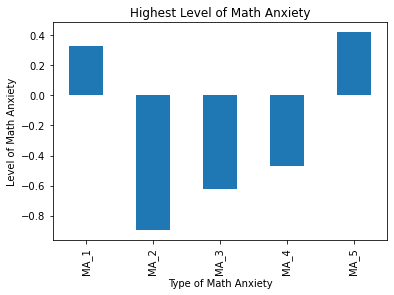

In [41]:
ma_mean.plot(kind = 'bar')
plt.title("Highest Level of Math Anxiety")
plt.xlabel("Type of Math Anxiety")
plt.ylabel("Level of Math Anxiety")

- Why did I use bar plot?<br/>
I think it's easier to compare each type of math anxiety in comparion to other type of math anxiety<br/>

- Is there anything that you think you need to polish or improve when it comes to your visualization?<br/>
After doing this, I realized two things that I need to fix.<br/>
Frist of all, people who didn't read the column decription couldn't understand what the columns meant, such as MA_1 in this graph.<br/>
Seondly, it quite seems unorganized that make you feel confused to interpret this graph

In [45]:
anxiety_keys = {"MA_1" : "Difficult",
               "MA_2" : "Tense",
               "MA_3" : "Nervous",
               "MA_4" : "Helpless",
               "MA_5" : "Poor Grades"}

In [46]:
def replaceKeys(y = True):
    if y:
        pos, lab = plt.yticks()
        new_lab = [anxiety_keys[x.get_text()] for x in lab]
        plt.yticks(pos, new_lab);
    else:
        pos, lab = plt.xticks()
        new_lab = [anxiety_keys[x.get_text()] for x in lab]
        plt.xticks(pos, new_lab);

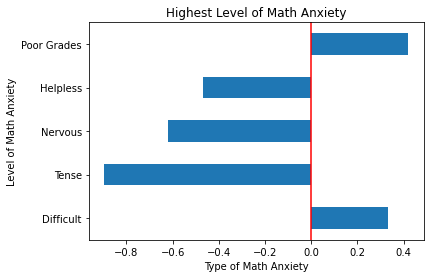

In [47]:
ma_mean.plot(kind = 'barh', rot = 0) # make a horizontal bar plot
plt.axvline(0, color = 'red') # add a line

plt.title("Highest Level of Math Anxiety")
plt.xlabel("Type of Math Anxiety")
plt.ylabel("Level of Math Anxiety")

replaceKeys()

### 3. What type of attributions have appeared the most?

In [49]:
att_mean = clean_df[['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6']].mean()

In [50]:
att_mean

AF_1   -0.221370
AF_2   -0.587813
AF_3   -0.639025
AF_4    0.017184
AF_5   -0.325427
AF_6   -0.556781
dtype: float64

In [51]:
# replace the yticks name

att_keys = {"AF_1":"Not Good",
            "AF_2":"Teacher - Explain",
            "AF_3":"Luck",
            "AF_4":"Hard",
            "AF_5":"Teacher - Interested",
            "AF_6":"Unlucky"}

In [52]:
def replaceKeysA(y = True):
    if y:
        pos, lab = plt.yticks()
        new_lab = [att_keys[x.get_text()] for x in lab]
        plt.yticks(pos, new_lab);
    else:
        pos, lab = plt.xticks()
        new_lab = [att_keys[x.get_text()] for x in lab]
        plt.xticks(pos, new_lab);

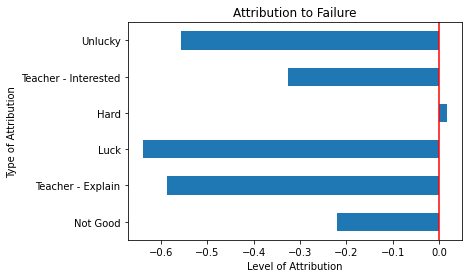

In [53]:
att_mean.plot(kind = 'barh', rot = 0) # make a horizontal bar plot
plt.axvline(0, color = 'red') # add a line

plt.title("Attribution to Failure")
plt.xlabel("Level of Attribution")
plt.ylabel("Type of Attribution")

replaceKeysA()

### 4. How's their math score?

In [54]:
# math score mean

clean_df['Score'].mean()

524.4825157697304

(array([4.000e+00, 5.800e+01, 4.260e+02, 1.597e+03, 3.558e+03, 4.245e+03,
        2.848e+03, 9.920e+02, 1.250e+02, 9.000e+00]),
 array([113.1095 , 190.93315, 268.7568 , 346.58045, 424.4041 , 502.22775,
        580.0514 , 657.87505, 735.6987 , 813.52235, 891.346  ]),
 <a list of 10 Patch objects>)

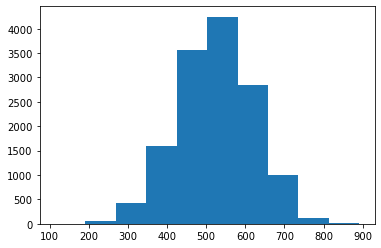

In [55]:
# distribution of math score

plt.hist(clean_df['Score'])

# Bivariate Exploration

### 1. Is there any difference in terms of math anxiety in comparison two countries?

In [81]:
# Group by each of the country and get the mean of math anxiety

country_mean = clean_df.groupby('Country')[
    ['MA_1','MA_2','MA_3','MA_4','MA_5']].mean()
country_mean

,MA_1,MA_2,MA_3,MA_4,MA_5
Country,,,,,
Finland,0.18565,-1.053977,-0.792939,-0.560703,0.216828
Korea,0.58783,-0.620793,-0.320358,-0.302500,0.778167


In [60]:
country_mean = country_mean.transpose() # transpose matrix
country_mean

Country,Finland,Korea
MA_1,0.185650,0.587830
MA_2,-1.053977,-0.620793
MA_3,-0.792939,-0.320358
MA_4,-0.560703,-0.302500
MA_5,0.216828,0.778167


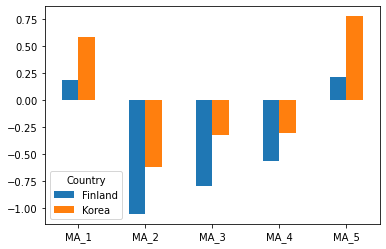

In [62]:
# bar plot

country_mean.plot.bar(rot = 0) 

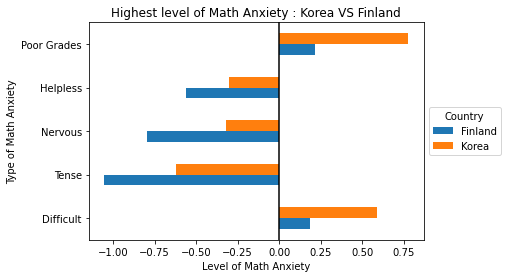

In [75]:
# polishing the visualization

country_mean.plot(kind = 'barh', rot = 0) # horizontal bar plot
plt.axvline(0, color = 'black') # add a black line on 0

plt.title("Highest level of Math Anxiety : Korea VS Finland") # title
plt.ylabel("Type of Math Anxiety")
plt.xlabel("Level of Math Anxiety")

replaceKeys() # replace the label

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), # relocate the legend
          title = "Country", title_fontsize = 10); # name the title of legend

### 2. Is there any difference attributions to failure between two countries?

In [80]:
# Grouping by country

country_att = clean_df.groupby('Country')[
    ['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6']].mean()
country_att

,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6
Country,,,,,,
Finland,-0.186135,-0.422161,-0.760182,0.109337,-0.27859,-0.525266
Korea,-0.283181,-0.878405,-0.426489,-0.144474,-0.40759,-0.612066


In [91]:
# transpose the x, y

country_att = country_att.transpose()

In [92]:
country_att

Country,Finland,Korea
AF_1,-0.186135,-0.283181
AF_2,-0.422161,-0.878405
AF_3,-0.760182,-0.426489
AF_4,0.109337,-0.144474
AF_5,-0.278590,-0.407590
AF_6,-0.525266,-0.612066


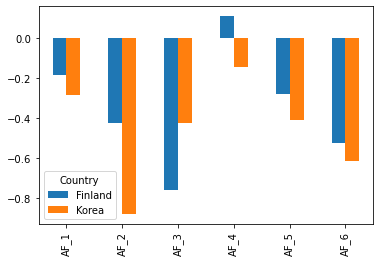

In [93]:
# bar plot

country_att.plot(kind = 'bar')

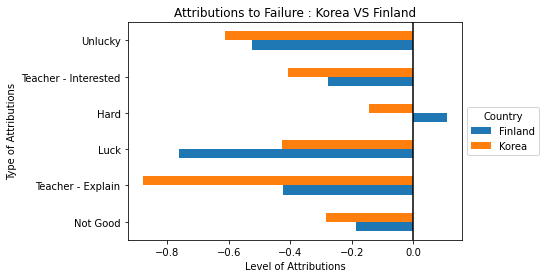

In [100]:
# polishing the visualizing

country_att.plot.barh(rot = 0) # horizontal bar plot
plt.axvline(0, color = 'black') # add a black line

plt.title("Attributions to Failure : Korea VS Finland")
plt.xlabel("Level of Attributions") 
plt.ylabel("Type of Attributions")

replaceKeysA() # replace the label

plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), # relocate the legend
          title = "Country", title_fontsize = 10); # name the title of legend

### Which country got a high math score?

In [101]:
clean_df.groupby('Country')['Score'].mean()

Country
Finland    507.525776
Korea      554.228404
Name: Score, dtype: float64

# Multivariate analysis

### 1. correlation between variables

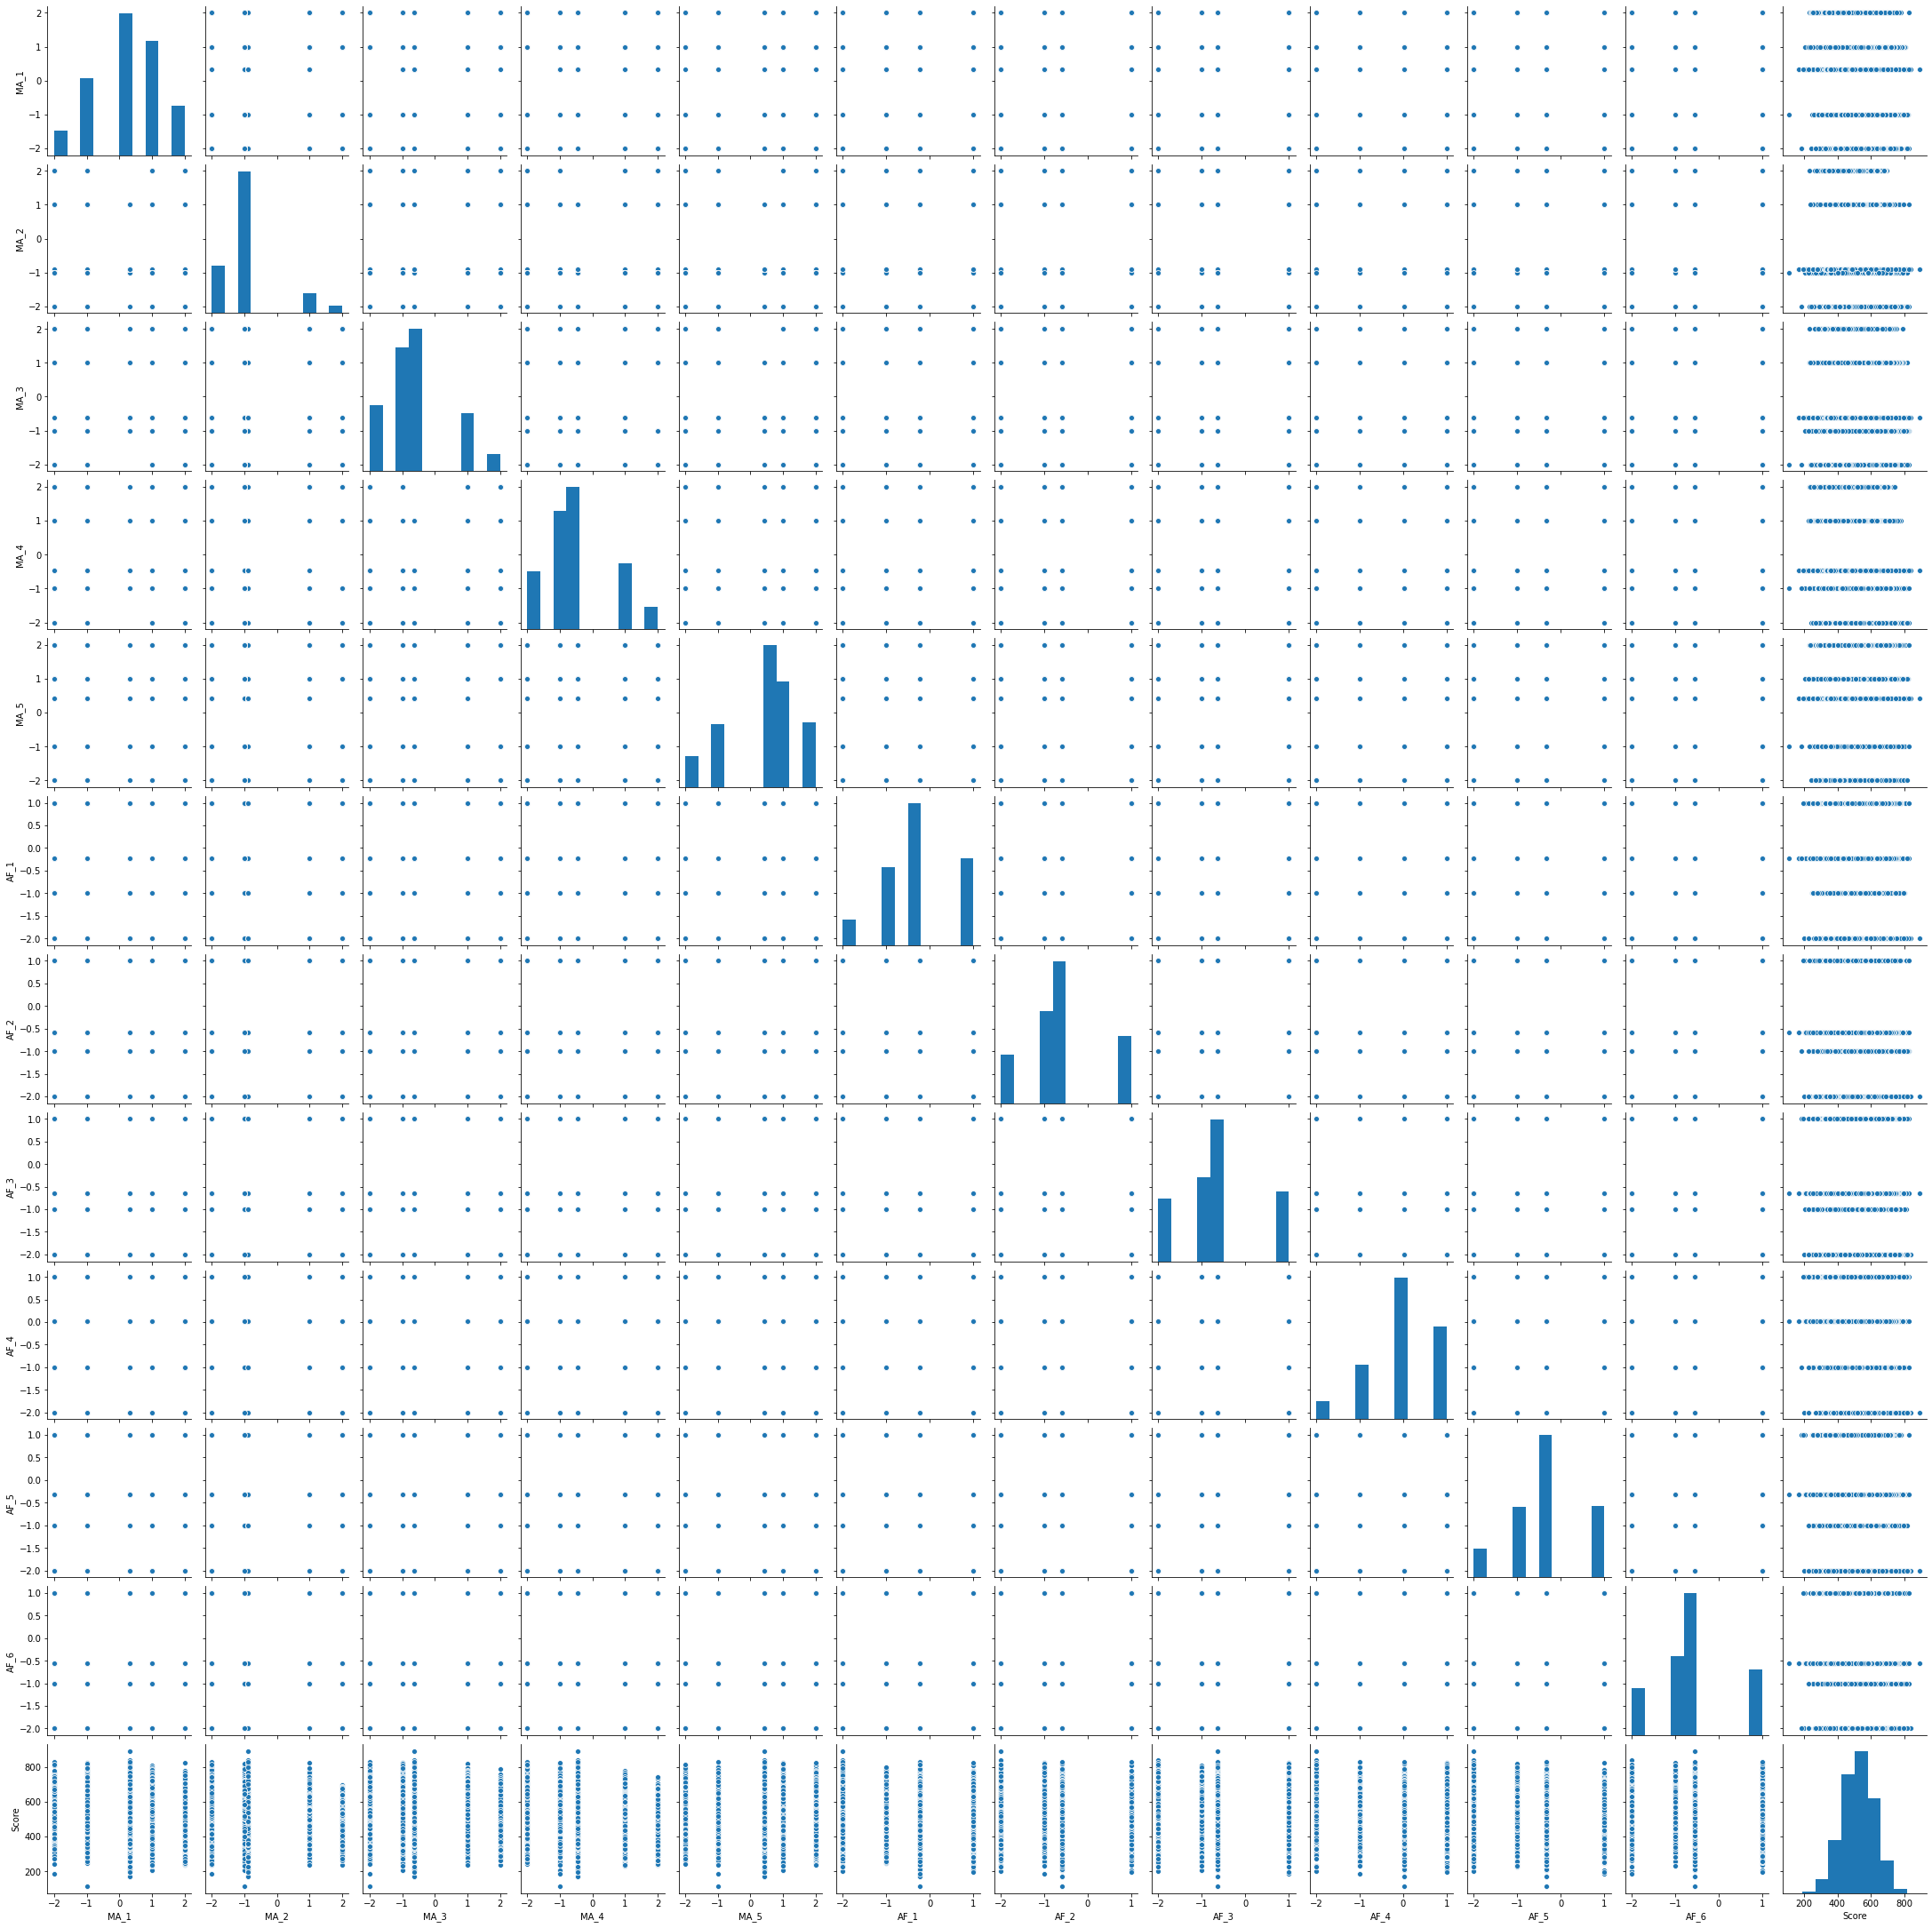

In [102]:
# pairplot

sb.pairplot(clean_df)

In [103]:
# sum of Attributions

clean_df['Attributions'] = clean_df[['AF_1','AF_2','AF_3',
                                     'AF_4','AF_5','AF_6']].sum(axis = 1)

In [104]:
# sum of Anxiety

clean_df['Anxiety'] = clean_df[['MA_1','MA_2','MA_3',
                                'MA_4','MA_5']].sum(axis = 1)

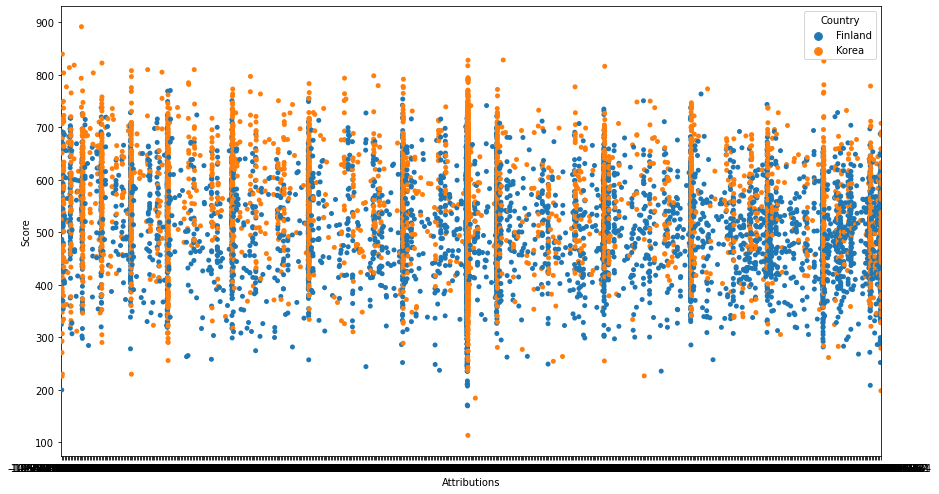

In [107]:
# stripplot : Attributions and Score

plt.figure(figsize = [14.70, 8.27])

sb.stripplot(data = clean_df, x = 'Attributions', y = 'Score', hue = 'Country',
           jitter = 0.35, dodge = True);

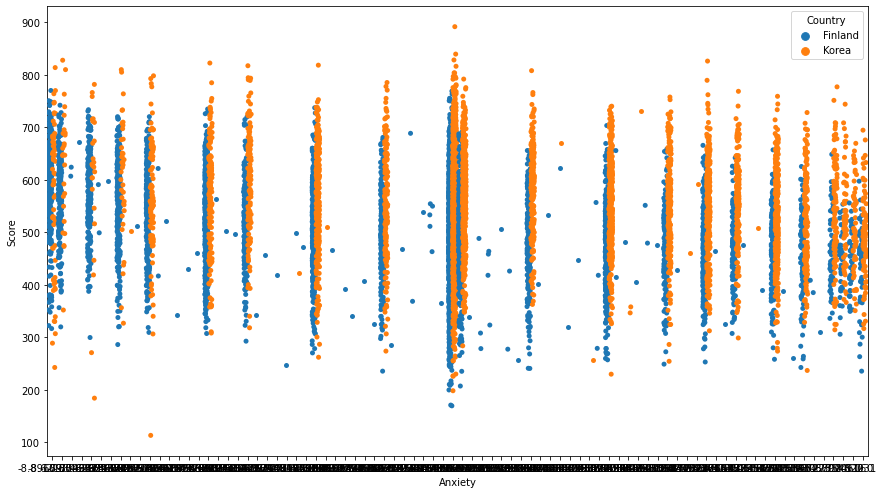

In [108]:
# stripplot : Anxiety and Score

plt.figure(figsize = [14.70, 8.27])

sb.stripplot(data = clean_df, x = 'Anxiety', y = 'Score', hue = 'Country',
           jitter = 0.35, dodge = True);